<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>

Вадим, доброго дня! рад приветствовать тебя)<br />
<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы ты мог использовать его для своего дальнейшего успеха) И очень здорово будет, если тебе удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<br> Я сразу же начал общаться на ты:) но если это не очень удобно, то дай знать)) <BR> В ПУТЬ!<br>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА:</b>
    
Привет, Николай! Спасибо за комментарии!
    
Сделал исследование мультиколлениарности, как ты советовал.

</div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
<font color='green'><br>Привет, Вадим! Спасибо) пошёл смотреть...

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

# Структура проекта
* [Открыть файл](#section_1)
* [Разделение данных](#section_2)
* [Исследование моделей](#section_3)
* [Проверка на тестовой выборке](#section_4)
* [Выводы](#section_5)


<a id='section_1'></a>

## Откройте и изучите файл

Открываем датасет, импортируем необходимые библиотеки, исследуем данные через info и describe

In [1]:
import pandas as pd
import random
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/datasets/users_behavior.csv')
display(df.head())
display(df.info())
display(df.describe())

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [2]:
df.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


Text(0.5, 1.05, '')

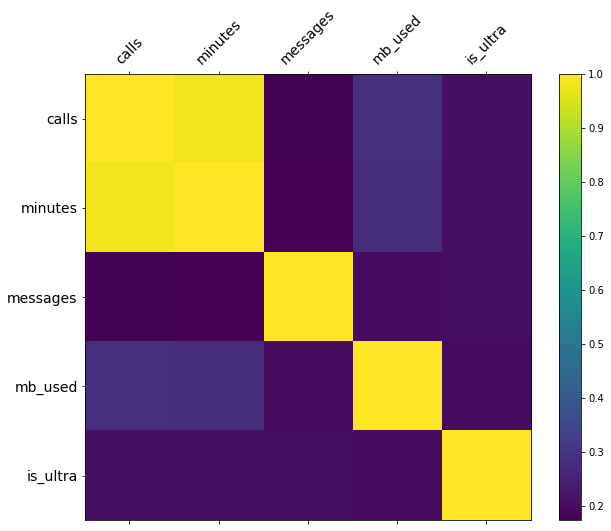

In [3]:
f = plt.figure(figsize=(10, 8))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params()
plt.title('', fontsize=16)

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА:</b>
    
Видим, Что между Calls и minutes есть плотная связь (оно и понятно), думаю, что количество звонком можно исключить. 
    
Ок, тут я на всякий случай задам вопрос: а почему нужно исключать взаимозависимые факторы? Как это помогает машинному обучению?

</div>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></font><br />
<font color='green'><br>
ОК с доработкой, в точку)<br>    
    
ВАЖНО!!! по использованию корреляций<br>
Этот инструмент - исключительно для данных в количественной шкале!!!!<br>
Т.е. is_ultra и minutes (например) - корреляцию не посмотреть. Т.к. Одна величина - номинальная (в виде 0 и 1, т.е. да/нет можно сказать), другая количественная. Поэтому для таких ситуаций подойдёт другая техника - сравнение групп (из темы "проверка гипотез" спринт 4, например).<br><br>
    
Ну и до "кучи" - такой ещё момент: есть понятие ложной корреляции (второй ряд картинок). Поэтому, вместе с расчётом самого коэффициента, также всегда смотерть скатерплот.<br>
    
По твоему вопросу.<br>
Тут два аспекта можно рассматривать:<br>
1) математический: когда два фактора имеют сильную корреляцию, то при матричных вычислениях внутри некоторых методов наступаю сложности. И самим методам внутри прихрдится их решать. Это может давать некторые неточности в расчётах. Плюс - скорость расчётов снижается.<br>
2) бизнесово-логичесвкая: если два фактора очень сильно связаны друг с другом, то значит они имеют примерно одинаковое влияние на целевую переменную. А значит какой смысл оба их держать в модели. Напрмиер, каким-то образом попадутся факторы скорости, измеренные в км/ч и м/с - тут всем ясно (и бизнесу в том числе), что один фактор - излишний.<br>
    
    
Спасибо) УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ!

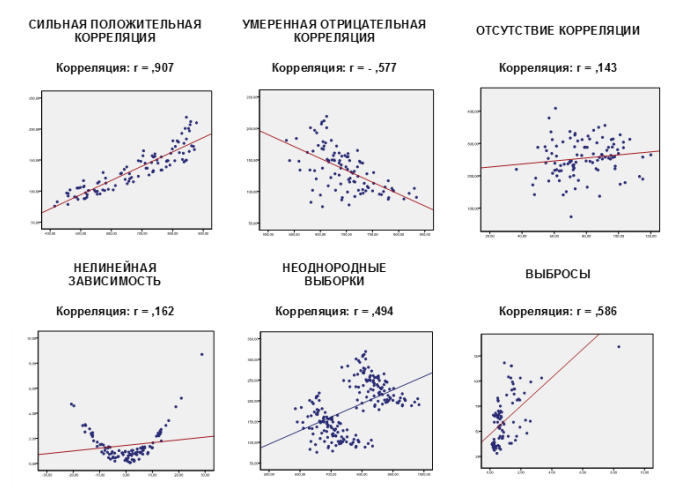

В датафрейме 3214 строк, пропущенных данных нет, в столбце is_ultra тип данных int, все остальные столбцы float64.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
ОК, данные загружены.<br>
В этом проекте отрабатывается навык построения предсказательных моделей. И не требуется уделять много времени предобработке данных (пропуски, дубликаты), верно. Но вот провести анализ факторов, которые буду входить в модель было бы не плохо.

Скажем, если есть мультиколлинеаорность факторов (когда факторы модели имеют сильную связь друг с другом), то сразу можно один из факторов исключить.<br>

<font color='red'>
Попробуй сделать некоторые аналитические "раскопки" по мультиколлинеарности факторов)<br>

<a id='section_2'></a>

## Разбейте данные на выборки

Разобъем данные на тренировочную выборку , валидационную и тестовую.

In [4]:
#Сперва хотел перемешать данные, но увидел, что в таком случае показатель качества каждый раз разный, решил оставить loc
#probs = np.random.rand(len(df))
#training_mask = probs < 0.8
#test_mask = probs >= 0.8
#df_training = df[training_mask]
#df_test = df[test_mask]

df_training = df.loc[:2570]
df_test = df.loc[2571:]

Разделим датасет на тренировочную и тестовую выборку в соотношении 80%/20%. 643/3214=0,2

In [5]:
display(df_training.shape)
display(df_test.shape)

(2571, 5)

(643, 5)

Разделим тренировочную выборку на тренировочную и валидационную в соотношении 75/25.

In [6]:
df_train, df_valid = train_test_split(df_training, test_size=0.25, random_state=12345) 

В итоге имеем тренировную , валидационную и тестовую выбоки с соотношением 60/20/20.

In [7]:
display(df_train.shape)
display(df_valid.shape)
display(df_test.shape)

(1928, 5)

(643, 5)

(643, 5)

Проверяем

In [8]:
df_train.shape[0] + df_valid.shape[0] + df_test.shape[0]

3214

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
ОК

<a id='section_3'></a>

## Исследуйте модели

Выделяем из тренировочной , валидационной и тестовой выборок  на признаки объектов и целевые показатели.

In [9]:
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']

features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

Проверим разделение

In [10]:
list = [features_train, target_train, features_valid, target_valid, features_test, target_test]
for x in list:
    display(x.head())

,calls,minutes,messages,mb_used
34,110.0,776.85,9.0,20790.93
1168,54.0,374.45,13.0,19344.75
1575,37.0,257.56,1.0,15763.70
635,69.0,524.58,79.0,20765.07
711,70.0,468.61,28.0,22586.68


34      1
1168    0
1575    0
635     0
711     0
Name: is_ultra, dtype: int64

,calls,minutes,messages,mb_used
1265,66.0,437.75,22.0,25108.55
796,87.0,588.90,66.0,8496.92
1760,62.0,442.67,27.0,11355.40
1518,13.0,96.30,33.0,6750.08
2442,93.0,639.07,29.0,26770.62


1265    0
796     0
1760    0
1518    1
2442    1
Name: is_ultra, dtype: int64

,calls,minutes,messages,mb_used
2571,71.0,533.63,21.0,7455.94
2572,32.0,188.41,78.0,25113.59
2573,63.0,419.72,0.0,43325.34
2574,126.0,832.11,75.0,14550.67
2575,74.0,617.02,69.0,20878.34


2571    1
2572    1
2573    1
2574    1
2575    0
Name: is_ultra, dtype: int64

### DecisionTreeClassifier

Приступим к обучению моделей. Начнем с DecisionTreeClassifier. Будем менять глубину в диапазоне от 1 до 5. Выведем показатели accuracy каждой глубины.

In [11]:
for depth in range(1, 6):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    print("max_depth =", depth, ": ", end='')
    print(accuracy_score(target_valid, predictions_valid)) 

max_depth = 1 : 0.7402799377916018
max_depth = 2 : 0.7713841368584758
max_depth = 3 : 0.7791601866251944
max_depth = 4 : 0.7838258164852255
max_depth = 5 : 0.7807153965785381


Обучив модель на тренировочной выборке, проверим на валидационной, имеем лучший показатель accuracy в глубине 4 (0.783).

### RandomForestClassifier

Перейдем к обучению модели RandomForestClassifier. Будем менять гиперпараметр n_estimators в диапазоне от 1 до 10, определим лучший показатель Accuracy.

In [12]:
best_model = None
best_result = 0
for est in range(1, 11):
    model2 = RandomForestClassifier(random_state=12345, n_estimators=est)
    model2.fit(features_train, target_train)
    result = model2.score(features_valid, target_valid)
    if result > best_result:
        best_model = est
        best_result = result
print("Accuracy наилучшей модели на валидационной выборке:", best_result)
print("Лучшее число деревьев от 1 до 10:", best_model)

Accuracy наилучшей модели на валидационной выборке: 0.7744945567651633
Лучшее число деревьев от 1 до 10: 6


Как можем наблюдать, лучшим показателем n_estimators = 6 с метрикой Accuracy 0.77

### LogisticRegression

Перейдем к модели LogisticRegression. Гиперпараметров у нее нет, запускаем как есть.

In [13]:
model3 = LogisticRegression(random_state=12345) 
model3.fit(features_train, target_train)
model3.predict(features_valid)
result3 = model.score(features_valid, target_valid)
result3

0.7807153965785381

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'><br>
Такая команда (можно поместить в самое начало тетрадки) иногда может помочь не выводить предупреждения)<br>
import warnings<br>
warnings.filterwarnings('ignore')<br>

В итоге имеем показатель Accuracy = 0,78

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>Хорошая модельная работа!

<a id='section_4'></a>

## Проверьте модель на тестовой выборке

### Проверка DecisionTreeClassifier на тестовой выборке

In [14]:
model = DecisionTreeClassifier(random_state=12345, max_depth=4) 
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)
print('Показатель accuracy: ', accuracy_score(target_test, predictions_test))

Показатель accuracy:  0.8040435458786936


### Проверка RandomForestClassifier на тестовой выборке

In [15]:
model2 = RandomForestClassifier(random_state=12345, n_estimators=6)
model2.fit(features_train, target_train)
predictions_test2 = model2.predict(features_test)
print('Показатель accuracy: ', accuracy_score(target_test, predictions_test2))

Показатель accuracy:  0.7947122861586314


### Проверка LogisticRegression на тестовой выборке

In [16]:
predictions_test3 = model3.predict(features_test)
print('Показатель accuracy: ', accuracy_score(target_test, predictions_test3))

Показатель accuracy:  0.7122861586314152


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
ОК, хорошо. Здесь ещё так можно: параметры модели подобраны на валидационной выборке и уже известны нам. Теперь можгно объединить трайн+валид для обучения и проверять на тесте. А параметры использовать подобранные. 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font><br>
<font color='green'><br>Вадим, хорошая модельная работа на этом спринте, уверенное движение)<br>
Оценил данные для модели, провел разносторннюю модельную работу с перебором параметров - ничего не забыто <br>
Метрики рассчитаны и выведены понятно и логично. Что ещё надо ревьеру для полного счастья))<br>
И видно, что проделана рабочая аналитическая работа.<br><br>
    
Этот проект - только начало моделирования. Дальше, конечно же, информация и скилы будут нарастать. <br>
Попробую изложить своё видение поиска моедли для прогнозирования чего-либо.<br>
Нучну с того, то у нас (у модели) есть цель: максимально точно описать поведение изучаемого процесса(объекта), чтобы предсказать его (объекта) поведение в будущем.<br> например поведение клиента или продажи в четверг на следующей неделе.<br>
Описать поведение можно с помощью математической формулы.<br>
И всё искусство аналитика - создать такую формулу-модель.<br>
На точность поиска формулы влияют три группы причин:<br>
1) тип модели: ты их как раз и перебираешь. Заранее не всегда можно сказать какая модель именно для конкретных данных подходит. Нужно пробовать, анализировать.<br>
2) гиперпараметры модели: =По умолчанию их выставляют оптимальными (в моделях их может быть десятки). И некоторые вот надо подбирать пребором -стараться улучшит. Причём границы - не известны. Понятно только, что надо стараться, чтобы их было меньше. Как в технике: чем проще изделие - тем меньше ломается) Чем проще модель, тем понянее.<br> Хотя сейчас новая эра настала: На одной из лекций DS-гуру я услышал как-то такие слова: "а не важно, как машина подобрала параметры, важно что она не ошиблась" Это был человек (фамилию забыл) близкий к разработкам гугла и яндекса. Странные слова, могут показаться... Но это факт.<br>
3) Внешние факторы для моделей: это то, что звонки, минуты.... С этим понятно. 
    
Вот, три группы возможностей создать хорошую модель. И каждым из них надо владеть DS-специалисту. В этом проекте, одна из целей - первичное знакомство с возможностями гиперпараметров.<br><br>
 
Если возвращаться к проекту ещё, то пару моментов зафиксировал бы, чтобы будущие проеты можно было ещё улучшить:<br>
1) Более глубокое предварительное исследование факторов: основная цель: понять философию факторов, которые мы хотим использовать для моделирования. Предварительная аналитика сможет улучшить модель и сделать её более устойчивой. Например, минуты и зывонки - мультиколлинеарны. <br><br>
    
<font color='red'>
Что ещё лучше сделать в этой работе:<br>    
Добавь, пожалуйста, корреляционный анализ факторов (найти корреляции между числовыми факторами и построить график скатерплот), чтобы выявить мультиколлинеарность факторови и принять решение о включении в модель<br>
<font color='green'>   
    
<br>Спасибо)<br>Буду ждать корретировкок.

## (бонус) Проверьте модели на адекватность

Честно говоря, не понял что именно от меня здесь хотят. Буду благодарен за направление мысли в нужную сторону.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font><br>
<font color='green'><br>
Интеренсое исследование!!!<br>
Под адекватностью можно понимать ещё и так: наша модель лучше для бизнеса, чем вообще без модели? <br>
Т.е. СТоит вкладываться в DS или можно позвать "деда Васю" и он так, на глаз...<br>
Когда модель прогнозирует колличественный параметр, например продажи в штуках, то модель сравнивают со средними продажами. Типа в среднем у нас продажи столько-то единиц товара будет завтра. Ну и сравнивают с предсказанием модели.<br>
Когда модель предсказывает количесвто угадывания, как в данном проекте, то считают просто количество по выборке<br>
    
Ну вот например такая команда<br>
df['is_ultra'].value_counts() / df.shape[0]<br>
    
покажет какая будет точность наличия 0.<br>
И тут идёт сравнение: если точность модели > вот этой константной (нулевой), то значит модель лучше предсказывает и она адекватна для использования<br>
    

Также, можно использовать DummyClassifier (вот это нам подойдёт most_frequent)     
    
strategies = ['stratified', 'most_frequent', 'uniform'] 
  
dummy_results = [] 
for strategy in strategies: 
    dc = DummyClassifier(strategy = strategy, random_state = 42)
    
    dc.fit(features_train, target_train) 
    result = dc.score(features_test, target_test) 
    dummy_results.append({strategy: result}) 

pd.DataFrame(dummy_results)    

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75


<a id='section_5'></a>

## Выводы:

Датасет был разбит на 3 выборки: тренировочную, валидационную и тестовую в соотношении 60/20/20.
Было проверено 3 модели:

DecisionTreeClassifier с показателем accuracy на тестовой выборке 0.8 (уровень depth = 4)

RandomForestClassifier с показателем accuracy на тестовой выборке 0.79 (уровень n_estimators = 6)

LogisticRegression с показателем accuracy на тестовой выборке 0.71

Исходя из проведенных исследований наилучшие показатели предсказаний классификации данных показали модели DecisionTreeClassifier и RandomForestClassifier